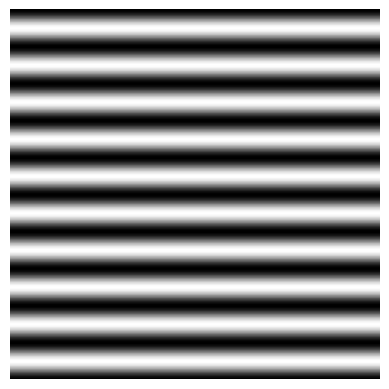

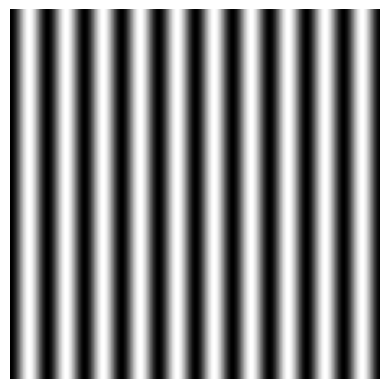

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
Angulo=np.radians(90)
A = 1
N = 256
fx = 0
fy = 10
x = np.linspace(-N/2,N/2 -1, N)
y = np.linspace(-N/2,N/2 -1, N)
X, Y = np.meshgrid(x, y)
f = A * np.cos(2 * np.pi * fx * X / N) * np.cos(2 * np.pi * fy * Y / N)
f_rotada= A * np.cos(2*np.pi * fx * (X*np.cos(Angulo) - Y*np.sin(Angulo)) / N) * np.cos(2*np.pi * fy * (X*np.sin(Angulo) + Y*np.cos(Angulo)) / N)
plt.axis('off')
plt.imshow(f, cmap="binary")
plt.show()
plt.axis('off')
plt.imshow(f_rotada, cmap="binary")
plt.show()

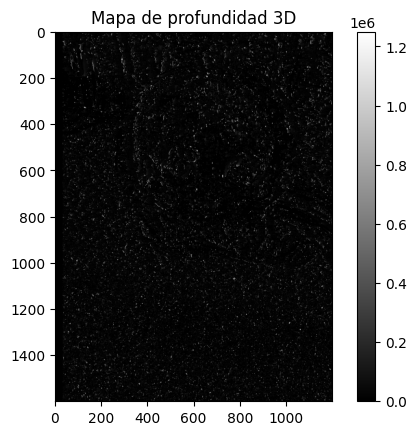

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 18 17:39:40 2024

@author: NeilO
"""
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Función para cargar y preprocesar las imágenes
def cargar_imagenes(imagen1, imagen2):
    img1 = cv2.imread(imagen1)
    img2 = cv2.imread(imagen2)
    # Convertir a escala de grises
    img1_gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gris = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return img1_gris, img2_gris

# Función para calcular la disparidad entre las imágenes
def calcular_disparidad(img1, img2):
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=5)
    disparidad = stereo.compute(img1, img2)
    return disparidad

# Función para generar la reconstrucción 3D
def reconstruccion_3d(disparidad):
    # Parámetros de la cámara
    focal_length = 10000
    baseline = 1000

    # Calcular la profundidad
    depth_map = np.zeros(disparidad.shape, dtype=np.float32)
    depth_map[disparidad > 0] = focal_length * baseline / disparidad[disparidad > 0]
    return depth_map

# Cargar las imágenes
imagen1, imagen2 = 'imagen1.jpeg', 'imagen2.jpeg'
img1, img2 = cargar_imagenes(imagen1, imagen2)

# Calcular la disparidad
disparidad = calcular_disparidad(img1, img2)

# Generar la reconstrucción 3D
depth_map = reconstruccion_3d(disparidad)

# Mostrar la reconstrucción 3D
plt.imshow(depth_map, cmap='gray')
plt.colorbar()
plt.title('Mapa de profundidad 3D')
plt.show()


4.8.0


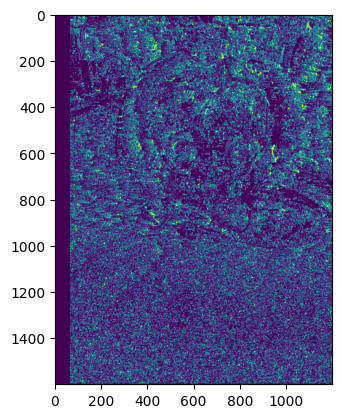

Image 1


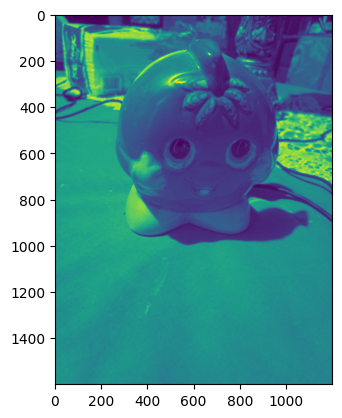

Image 2


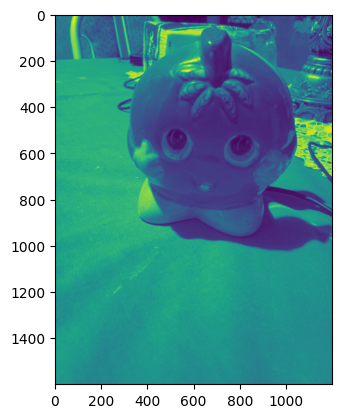

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
print(cv.__version__)
imgL = cv.imread('imagen1.jpeg', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('imagen2.jpeg', cv.IMREAD_GRAYSCALE)
stereo = cv.StereoBM.create(numDisparities=0, blockSize=5)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity)
plt.show()
print("Image 1")
plt.imshow(imgL)
plt.show()
print("Image 2")
plt.imshow(imgR)
plt.show()

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

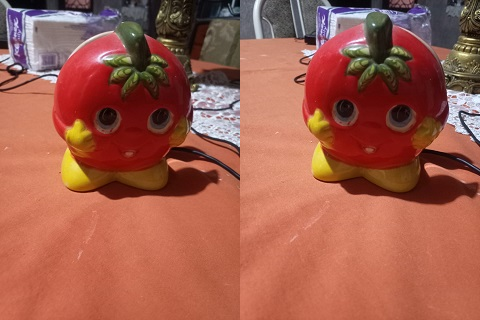

In [ ]:
image1_name="imagen1.jpg"
image2_name="imagen2.jpg"
img1=cv.imread(image1_name)
img2=cv.imread(image2_name)
img1_gray=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2_gray=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
final_frame=cv.hconcat((img1,img2))
cv2_imshow(final_frame)

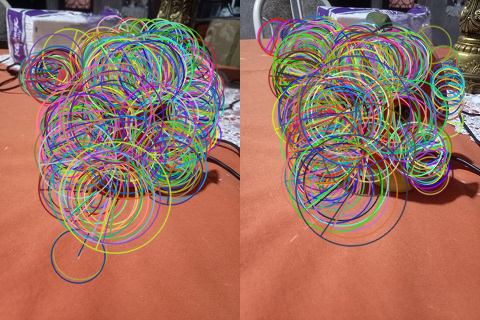

In [ ]:
orb1=cv.ORB_create(500)
orb2=cv.ORB_create(500)

keypoint1, des1= orb1.detectAndCompute(img1,None)
keypoint2, des2= orb2.detectAndCompute(img2,None)
img_orb_1=cv.drawKeypoints(img1,keypoint1,None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_orb_2=cv.drawKeypoints(img2,keypoint2,None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
final_frame=cv.hconcat((img_orb_1,img_orb_2))
cv2_imshow(final_frame)

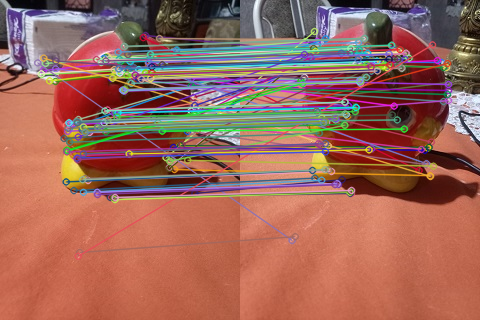

In [ ]:
orb=cv.ORB_create(nfeatures=800)
keypoints1,descriptors1=orb.detectAndCompute(img1,None)
keypoints2,descriptors2=orb.detectAndCompute(img2,None)

bf=cv.BFMatcher_create(cv.NORM_HAMMING,crossCheck=True)
matches=bf.match(descriptors1,descriptors2)
orb_matches=cv.drawMatches(img1,keypoints1,img2,keypoints2,matches[:500],None,flags=2)
cv2_imshow(orb_matches)

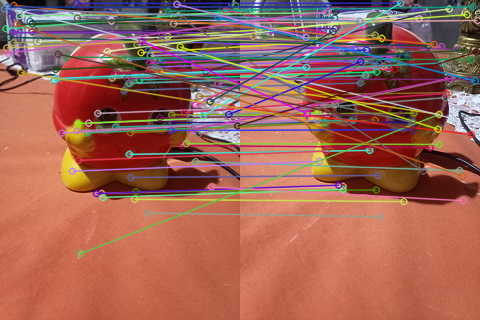

In [ ]:
sift=cv.xfeatures2d.SIFT_create()
keypoints1, descriptors1=sift.detectAndCompute(img1,None)
keypoints2, descriptors2=sift.detectAndCompute(img2,None)


bf=cv.BFMatcher_create(cv.NORM_L2,crossCheck=True)
matches=bf.match(descriptors1,descriptors2)
matches=sorted(matches,key=lambda x: x.distance)

SIFT_matches=cv.drawMatches(img1,keypoints1,img2,keypoints2,matches[:200],None,flags=2)
cv2_imshow(SIFT_matches)

In [ ]:
kp1,des1 =sift.detectAndCompute(img1,None)
kp2,des2 =sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE=1
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)
flann= cv.FlannBasedMatcher(index_params,search_params)
matches= flann.knnMatch(des1,des2,k=2)
pts1=[]
pts2=[]

for i,(m,n) in enumerate(matches):
  if m.distance < 0.8*n.distance:
    pts2.append(kp2[m.trainIdx].pt)
    pts1.append(kp1[m.trainIdx].pt)

pts1=np.int32(pts1)
pts2=np.int32(pts2)

def drawlines(img1,img2,lines,pts1,pts2):
  r,c =img1.shape
  img1=cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
  img2=cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
  for r,pt1,pt2 in zip(lines,pts1,pts2):
    color=tuple(np.random.randint(0,255,3).tolist())
    x0,y0=map(int,[0,-r[2]/r[1] ])
    x1,y1=map(int,[c,-(r[2]+r[0]*c)/r[1] ])
    img1=cv.line(img1,(x0,y0),(x1,y1),color,1)
    img1=cv.circle(img1,tuple(pt1),5,color,-1)
    img2=cv.circle(img2,tuple(pt2),5,color,-1)
  return img1,img2


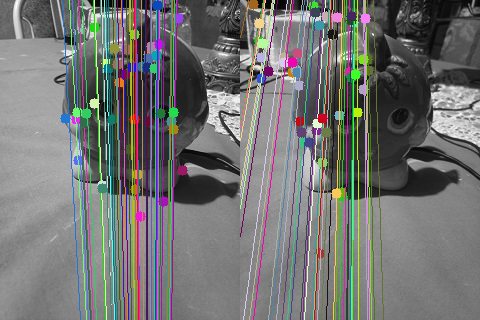

In [ ]:
F,mask=cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
pts1_filter=pts1[mask.ravel()==1]
pts2_filter=pts2[mask.ravel()==1]

lines2=cv.computeCorrespondEpilines(pts1_filter.reshape(-1,1,2),1,F)
lines2=lines2.reshape(-1,3)
img3,img4=drawlines(img2_gray,img1_gray,lines2,pts2_filter,pts1_filter)

lines1=cv.computeCorrespondEpilines(pts2_filter.reshape(-1,1,2),2,F)
lines1=lines1.reshape(-1,3)
img5,img6=drawlines(img1_gray,img2_gray,lines1,pts1_filter,pts2_filter)

final_frame=cv.hconcat((img3,img5))
cv2_imshow(final_frame)

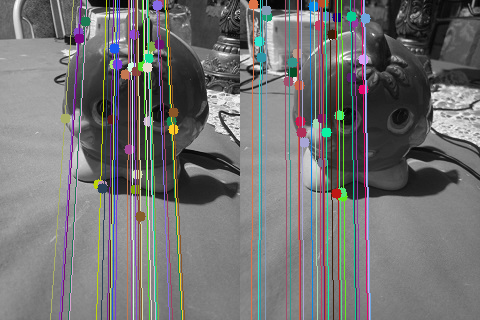

In [ ]:
F,mask=cv.findFundamentalMat(pts1,pts2,cv.RANSAC)
pts1_filter=pts1[mask.ravel()==1]
pts2_filter=pts2[mask.ravel()==1]

lines2=cv.computeCorrespondEpilines(pts1_filter.reshape(-1,1,2),1,F)
lines2=lines2.reshape(-1,3)
img3,img4=drawlines(img2_gray,img1_gray,lines2,pts2_filter,pts1_filter)

lines1=cv.computeCorrespondEpilines(pts2_filter.reshape(-1,1,2),2,F)
lines1=lines1.reshape(-1,3)
img5,img6=drawlines(img1_gray,img2_gray,lines1,pts1_filter,pts2_filter)

final_frame=cv.hconcat((img3,img5))
cv2_imshow(final_frame)

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
def ExtractCameraPoses(E):
  u,d,v=np.linalg.svd(E)
  W=np.array([[0,-1,0],[1,0,0],[0,0,1]])
  Rs,Cs=np.zeros((4,3,3)), np.zeros((4,3,3))
  t=u[:,-1]
  R1=u.dot(W.dot(v))
  R2=u.dot(W.T.dot(v))
  if np.linalg.det(R1)<0:
    R1=R2*-1
  if np.linalg.det(R2)<0:
    R2=R1*-1
  return R1,R2,t

def PlotCamera(R,t,ax,scale=0.5,depth=0.5,faceColor='grey'):
  C=-t
  axes=np.zeros((3,6))
  axes[0,1],axes[1,3],axes[2,5]=1,1,1
  axes=R.T.dot(axes)+C[:,np.newaxis]

  ax.plot3D(xs=axes[0,:2],ys=axes[1,:2],zs=axes[2,:2],c='r')
  ax.plot3D(xs=axes[0,2:4],ys=axes[1,2:4],zs=axes[2,2:4],c='g')
  ax.plot3D(xs=axes[0,4:],ys=axes[1,4:],zs=axes[2,4:],c='b')

  pt1=np.array([[0,0,0]]).T
  pt2=np.array([[scale,-scale,depth]]).T
  pt3=np.array([[scale,scale,depth]]).T
  pt4=np.array([[-scale,-scale,depth]]).T
  pt5=np.array([[-scale,scale,depth]]).T
  pts=np.concatenate((pt1,pt2,pt3,pt4,pt5),axis=-1)

  pts=R.T.dot(pts)+C[:,np.newaxis]
  ax.scatter3D(xs=pts[0,:],ys=pts[1,:],zs=pts[2,:],c='k')

  verts=[[pts[:,0],pts[:,1],pts[:,2]],[pts[:,0],pts[:,2],pts[:,-1]],
         [pts[:,0],pts[:,-1],pts[:,-2]], [pts[:,0],pts[:,-2],pts[:,1]]]

  ax.add_collection3d(Poly3DCollection(verts,facecolors=faceColor,linewidths=1,edgecolors='k',alpha=0.25))


In [ ]:
width,height=img1_gray.shape
focal_length=np.maximum(width,height);
center=(height/2,width/2)
K= np.array(
    [[focal_length,0,center[0]],
     [0,focal_length,center[1]],
     [0,0,1]],dtype="double"
)
K

array([[320.,   0., 120.],
       [  0., 320., 160.],
       [  0.,   0.,   1.]])

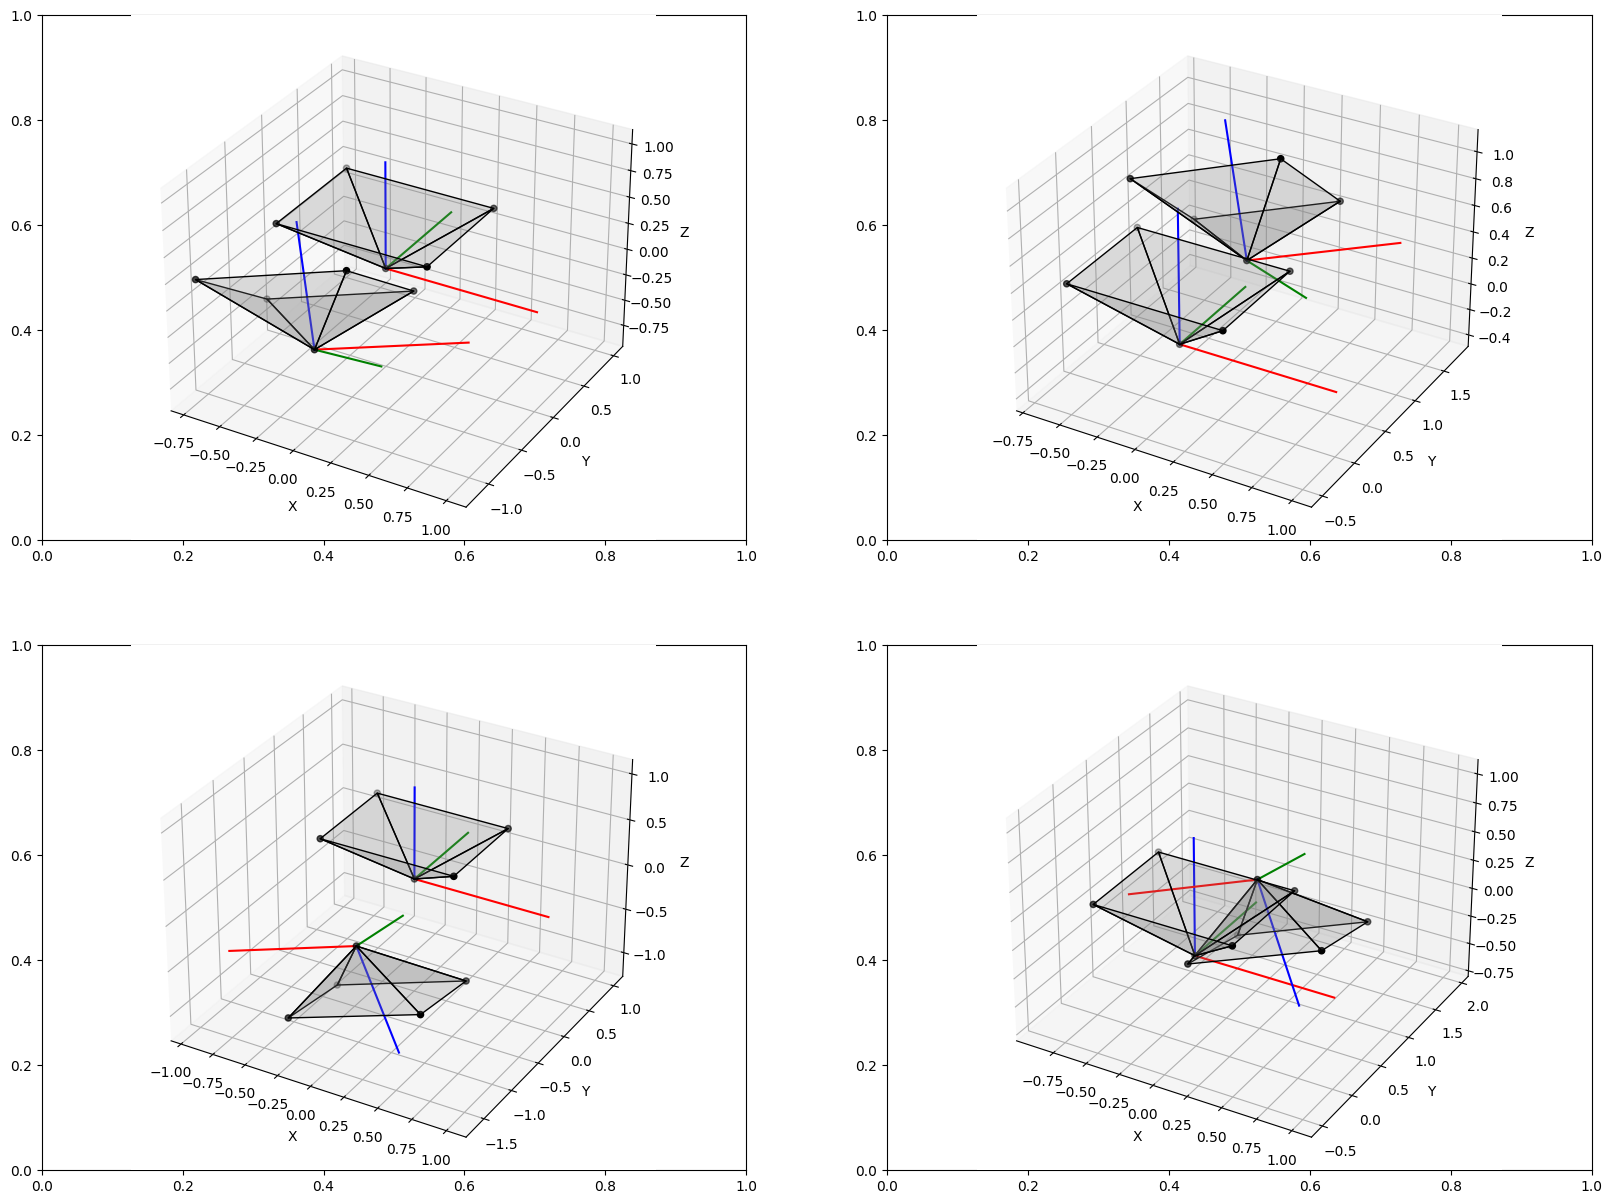

In [ ]:
E=K.T.dot(F.dot(K))

R1,R2,t =ExtractCameraPoses(E)
t=t[:,np.newaxis]

fig, axs=plt.subplots(2,2,figsize=(20,15))
count=1
for i,R_ in enumerate([R1,R2]):
  for j,t_ in enumerate([t,-t]):
    axs[i,j]=fig.add_subplot(2,2,count,projection='3d')
    axs[i,j].set_xlabel('X')
    axs[i,j].set_ylabel('Y')
    axs[i,j].set_zlabel('Z')
    PlotCamera(np.eye(3,3),np.zeros((3,)),axs[i,j])
    PlotCamera(R_,t_[:,0],axs[i,j])
    count+=1


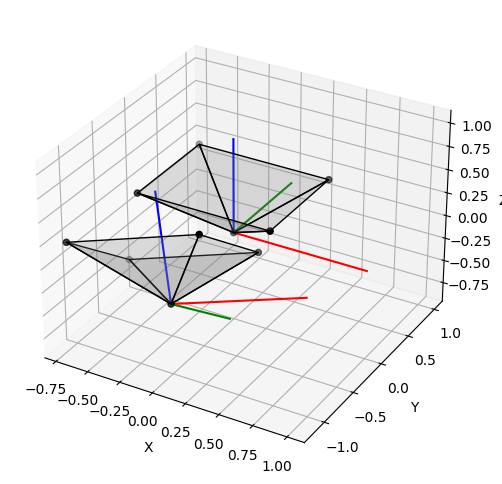

In [ ]:
_,R,t,mask=cv.recoverPose(E,pts1,pts2,K)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

PlotCamera(np.eye(3,3),np.zeros((3,)),ax)
PlotCamera(R,t[:,0],ax)


In [ ]:
R_t_0=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
R_t_1=np.empty((3,4))
R_t_1[:3,:3]=np.matmul(R,R_t_0[:3,:3])
R_t_1[:3,3]=R_t_0[:3,3]+np.matmul(R,R_t_0[:3,3],t.ravel())

print("The R_t_0 \n "+str(R_t_0))

print("The R_t_1 \n "+str(R_t_1))
P1=np.matmul(K,R_t_0)
P2=np.matmul(K,R_t_1)
print("The projection matrix 1 \n"+ str(P1))

print("The projection matrix 2 \n"+ str(P2))


The R_t_0 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
The R_t_1 
 [[ 0.91617868  0.18649433  0.3547344   0.        ]
 [ 0.07381152  0.79147076 -0.6067338   0.        ]
 [-0.39391432  0.58206006  0.7113632   0.        ]]
The projection matrix 1 
[[320.   0. 120.   0.]
 [  0. 320. 160.   0.]
 [  0.   0.   1.   0.]]
The projection matrix 2 
[[245.90745846 129.52539188 198.87859295   0.        ]
 [-39.40660298 346.40025065 -80.33670387   0.        ]
 [ -0.39391432   0.58206006   0.7113632    0.        ]]


In [ ]:
def GetTriangulatedPts(img1pts,img2pts,K,R,t,triangulateFunc):

  img1ptsHom=cv.convertPointsToHomogeneous(img1pts)[:,0,:]
  img2ptsHom=cv.convertPointsToHomogeneous(img2pts)[:,0,:]

  img1ptsNorm=(np.linalg.inv(K).dot(img1ptsHom.T)).T
  img2ptsNorm=(np.linalg.inv(K).dot(img2ptsHom.T)).T

  img1ptsNorm=cv.convertPointsFromHomogeneous(img1ptsNorm)[:,0,:]
  img2ptsNorm=cv.convertPointsFromHomogeneous(img2ptsNorm)[:,0,:]

  pts4d=triangulateFunc(np.eye(3,4),np.hstack((R,t)),img1ptsNorm.T,img2ptsNorm.T)
  pts3d=cv.convertPointsFromHomogeneous(pts4d.T)[:,0,:]
  return pts3d


In [ ]:
pts3d=GetTriangulatedPts(pts1.T,pts2.T,K,R,t,cv.triangulatePoints)

In [ ]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=pts3d[:,0],y=pts3d[:,1],z=pts3d[:,2],mode='markers',marker=dict(
    size=2,
    color='red',
    opacity=0.8
))])
fig.update_layout(autosize=False,width=900,height=900)
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Mesh3d(x=pts3d[:,0],y=pts3d[:,1],z=pts3d[:,2],color='lightpink',opacity=0.80)])
fig.update_layout(autosize=False,width=900,height=900)
fig.show()

In [ ]:
import os
from scipy.optimize import least_squares
image_list=[
    "imagen1.jpg",
    "imagen2.jpg",
]


In [ ]:
def reprojection_loss_function(opt_variables,points_2d,num_pts):
  P=opt_variables[0:12].reshape(3,4)
  point_3d=opt_variables[12:].reshape((num_pts,4))
  rep_error=[]
  for idx,pt_3d in enumerate(point_3d):
    pt_2d=np.array([points_2d[0][idx],points_2d[1][idx]])
    reprojected_pt =np.matmul(P,pt_3d)
    reprojected_pt /= reprojected_pt[2]
    rep_error.append(pt_2d-reprojected_pt[0:2])
    return np.array(rep_error).ravel()

def bundle_adjustment(points_3d,points_2d,img,projection_matrix):
  opt_variables=np.hstack((projection_matrix.ravel(),points_3d.ravel(order="F")))
  num_points=len(points_2d[0])

  corrected_values=least_squares(reprojection_loss_function,opt_variables,args=(points_2d,num_points))
  print("The optimized values \n "+str(corrected_values))
  P=corrected_values.x[0:12].reshape[3,4]
  points_3d=corrected_values.x[12:].reshape((num_points,4))
  return P, points_3d

In [ ]:
prev_img=None
prev_kp=None
prev_desc=None

K=np.array([[1.024e+03,0.000e+00,5.120e+02],[0.000e+00,1.024e+03,3.840e+02],[0.000e+00,0.000e+00,1.000e+00]])
R_t_0=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
R_t_1=np.empty((3,4))
P1=np.matmul(K,R_t_0)
P2=np.empty((3,4))
pts_4d=[]

X=np.array([])
Y=np.array([])
Z=np.array([])

for iter,filename in enumerate(image_list):
  print(filename)
  file=os.path.join("./",filename)
  img=cv.imread(file,0)
  resized_img=img
  sift=cv.xfeatures2d.SIFT_create()
  kp,desc=sift.detectAndCompute(resized_img,None)
  if iter==0:
    prev_img=resized_img
    prev_kp=kp
    prev_desc=desc
  else:
    FLANN_INDEX_KDTREE=1
    index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
    search_params=dict(checks=100)
    flann=cv.FlannBasedMatcher(index_params,search_params)
    matches=flann.knnMatch(prev_desc,desc,k=2)
    good=[]
    pts1=[]
    pts2=[]
    for i,(m,n) in enumerate(matches):
      if m.distance<0.8*n.distance:
        good.append(m)
        pts1.append(prev_kp[m.queryIdx].pt)
        pts2.append(kp[m.trainIdx].pt)

    pts1=np.array(pts1)
    pts2=np.array(pts2)

    F,mask=cv.findFundamentalMat(pts1,pts2,cv.FM_RANSAC)
    print("La matriz fundamental es\n"+ str(F))

    pts1=pts1[mask.ravel()==1]
    pts2=pts2[mask.ravel()==1]

    E=K.T.dot(F.dot(K))
    print("La matriz calibración es\n"+ str(E))

    retval,R,t,mask=cv.recoverPose(E,pts1,pts2,K)
    R_t_1[:3,:3]=np.matmul(R,R_t_0[:3,:3])
    R_t_1[:3,3]= R_t_0[:3,3]+np.matmul(R_t_0[:3,:3],t.ravel())
    print("The R_t_0 \n" + str(R_t_0))
    print("The R_t_1 \n" + str(R_t_1))

    pts1=np.transpose(pts1)
    pts2=np.transpose(pts2)

    print("Shape pts1\n" + str(pts1.shape))

    points_3d=cv.triangulatePoints(P1,P2,pts1,pts2)
    points_3d/=points_3d[3]

    """P2, points_3D=bundle_adjustment(points_3d,pts2,resized_img,P2)
    opt_variables=np.hstack((P2.ravel(),points_3d.ravel(order="F")))
"""
    X=np.concatenate((X,pts3d[:,0]))
    Y=np.concatenate((X,pts3d[:,1]))
    Z=np.concatenate((X,pts3d[:,2]))

    R_t_0=np.copy(R_t_1)
    P1=np.copy(P2)
    prev_img=resized_img
    prev_kp=kp
    prev_desc=desc


imagen1.jpg
imagen2.jpg
La matriz fundamental es
[[ 2.61135406e-05  9.22877125e-05 -2.38285216e-02]
 [-5.15677729e-04 -1.55116676e-05  3.28644997e-01]
 [ 3.28518482e-02 -2.78333697e-01  1.00000000e+00]]
La matriz calibración es
[[  27.38203198   96.77068043   25.57961501]
 [-540.72729026  -16.26516235   60.06939569]
 [-155.44142527 -242.72780179  -53.74416262]]
The R_t_0 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
The R_t_1 
[[ 0.48100877 -0.26583441  0.83544158 -0.9258053 ]
 [ 0.18120955  0.96249045  0.20192878  0.06038527]
 [-0.85778416  0.05426048  0.51113808 -0.37314631]]
Shape pts1
(2, 53)


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig=go.Figure(data=[go.Scatter3d(x=pts3d[:,0],y=pts3d[:,1],z=pts3d[:,2],mode='markers',marker=dict(size=2,color='red',opacity=0.7))])
fig.update_layout(autosize=False,width=900,height=900)
fig.show()

In [ ]:
fig=go.Figure(data=[go.Mesh3d(x=pts3d[:,0],y=pts3d[:,1],z=pts3d[:,2],color='lightpink',opacity=0.80)])
fig.update_layout(autosize=False,width=900,height=900)
fig.show()

In [ ]:
#Cambiar de cuaderno a uno con GPU
import tensorflow as tf
device_name=tf.test.gpu_device_name()
if device_name!='/device:GPU:0':
  raise SystemError('GPU device not found')
print("Found GPU at: {}".format(device_name))

In [ ]:
#Cambiar de cuaderno a uno con GPU
!wget -N https://www.fosshub.com/Meshroom.html?dwl=Meshroom-2023.3.0-linux.tar.gz
!mkdir Meshroom
!tar xzf Meshroom-2023.3.3-linux.tar.gz -C ./meshroom


In [ ]:
#Cambiar de cuaderno a uno con GPU
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cambiar de cuaderno a uno con GPU
!mkdir ./object_out
!./meshroom/Meshroom-2023.3.3/meshroom_photogrammetry --input /content/drive/MyDrive/servicio/images/ --output ./object_out


In [ ]:
#Cambiar de cuaderno a uno con GPU
from google.colab import files
!zip -r meshobject.zip ./object_out
files.download('meshobject.zip')